# Seepage analysis using Finite Difference Method



## Gauss-Seidel pythonic

# of steps: 978, duration: 0 seconds, error: 9.992487e-10


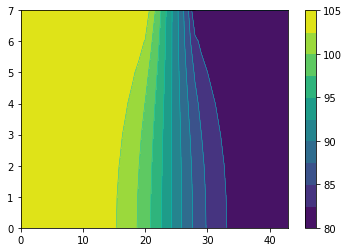

In [1]:
# Seepage analysis using Finite Difference Method
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Geometry
## Dam size in m
damStart = 200
damLength = 80

## Domain size in m
height = 80
length = 440

## Grid size in m
dx = 10

# Head on left and right
lhead = 105
rhead = 80

# No need to change anything below this
ldam = int(damStart/dx)
rdam = int((damStart + damLength)/dx)

## Head
h = np.zeros([int(height/dx), int(length/dx)])

# Left head
h[0, 0:ldam]= lhead
# Right head
h[0, (ldam + 1):]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros(np.shape(h))

(nrows, ncols) = h.shape


# Start clock
start_time = time.time()

# Gauss-Seidel iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()

    # Domain
    h[1:nrows-1, 1:ncols-1]=(h[0:nrows-2,1:ncols-1]+h[2:nrows,1:ncols-1]+h[1:nrows-1,0:ncols-2]+
                             h[1:nrows-1,2:ncols])/4

    # Top left side of dam boundary assign head
    #if i == 0 and j <= (ldam + 1):
    h[0,:(ldam + 2)] = lhead

    # Top boundary beneath the dam
    #elif i == 0 and j > (ldam + 1) and j < (rdam + 1):
    #h[0,(ldam + 1):(rdam+2)] = (h[0,j-1]+h[i,j+1]+2*h[i+1,j])/4;
    h[0,(ldam + 1):(rdam+2)] = (h[0,ldam:rdam+1]+h[0,(ldam+2):(rdam+3)]+2*h[1,(ldam + 1):(rdam+2)])/4;

    # Top right side of dam boundary assign head
    #elif i == 0 and j > (rdam):
    h[0,rdam:]= rhead

    # Left boundary
    # elif j == 0 and i > 0 and i < (nrows -1):
    h[1:(nrows-1),0]=(h[0:(nrows-2),0]+h[2:nrows,0]+2*h[1:(nrows-1),1])/4

    # Right boundary
    # elif j == (ncols -1) and i > 0 and i < (nrows - 1):
    h[1:(nrows-1),(ncols-1)]=(2*h[1:(nrows-1),(ncols-2)]+h[0:(nrows-2),(ncols-1)]+h[2:(nrows),(ncols-1)])/4

    # Left bottom corner
    # elif i == (nrows -1) and j == 0:
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1),0]=(h[nrows-2,0]+h[nrows-1,1])/2

    # Bottom boundary
    # elif i == (nrows -1) and j > 0 and j < (ncols - 1):
    h[nrows-1,1:(ncols-1)]=(h[(nrows-1),0:(ncols-2)]+h[(nrows-1),2:(ncols)]+2*h[(nrows-2),1:(ncols-1)])/4

    # Right bottom corner
    # elif i == (nrows -1) and  j == (ncols -1):
    h[(nrows -1),(ncols -1)]=(h[(nrows -1),(ncols -2)]+h[(nrows -2),(ncols -2)])/2

    # Error
    error = (np.square(np.subtract(h, residual))).max()

elapsed_time = time.time() - start_time    
print('# of steps: %d, duration: %d seconds, error: %le' %(step, elapsed_time, error))
plt.contour(np.flipud(h), 10, linewidths=0.5, colors='c')
plt.contourf(np.flipud(h), 10)
plt.colorbar()



[0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1
 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6
 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3
 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0
 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5
 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2
 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7
 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]


ValueError: 'x' values must be equally spaced

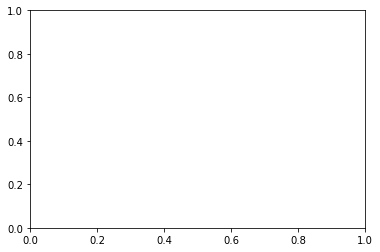

In [35]:
x = []
y = []

for i in range(0, h.shape[1]):
    for j in range(0, h.shape[0]):
        x.append(j)
        y.append(i)

z = np.ravel(h)

from scipy.interpolate import Rbf
# Interpolate these onto a regular grid
xi, yi = np.mgrid[0:1:100j, 0:1:100j]
func = Rbf(x, y, z, function='linear')
zi = func(xi, yi)

dy, dx = np.gradient(-h)

fig, ax = plt.subplots()
ax.streamplot(x, y, dx, dy, color='0.8', density=1)

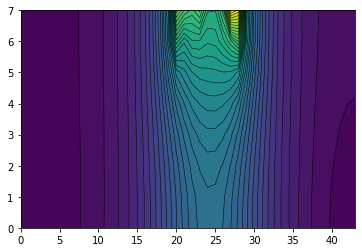

In [14]:
flow = np.gradient(-h)
mag = np.sqrt(flow[0]**2 + flow[1]**2)
plt.contour(np.flipud(mag), 50, linewidths=0.5, colors='k')
plt.contourf(np.flipud(mag), 50)


## Gauss-Seidel iteration

In [1]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0, 0:ldam]= lhead
# Right head
h[0, (ldam + 1):]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Gauss-Seidel iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j <= (ldam + 1):
                h[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > (ldam + 1) and j < (rdam + 1):
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > (rdam):
                h[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                h[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                h[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    # Error
    error = (np.square(np.subtract(h, residual))).max()

print('# of steps: %d, error: %le' %(step, error))

KeyboardInterrupt: 

In [ ]:
plt.contour(np.flipud(h), levels=25)

## Jacobi iteration with convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Convolution
from scipy.ndimage import convolve, generate_binary_structure
import time

# Geometry
rows = 80
cols = 440

## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([rows, cols])
lhead = 105
rhead = 0

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Start clock
start_time = time.time()

# Jacobi iteration
while error > tolerance:
    # Number of steps
    step = step + 1
    
    # Copy the head grid to residual
    residual = h.copy()
    
    # Finite Difference Method
    # Top left side of dam boundary assign head
    # if i == 0 and j <= (ldam):
    h[0, :(ldam+1)] = lhead

    # Top right side of dam boundary assign head
    # i == 0 and j > (rdam):
    h[0, (rdam+1):]= rhead
    
    # h[i, j] = (h[i-1, j] + h[i, j-1] + h[i, j+1] + h[i+1, j]) / 4
    # Define a kernel function with active neighbours
    k = generate_binary_structure(2, 1)
    k[1, 1] = False
    
    # Use convolution instead of loop iteration
    # https://en.wikipedia.org/wiki/Convolution
    B = convolve(h, k, mode='constant', cval=0.0)
    B *= 0.25
    
    # Top boundary beneath the dam
    # i == 0 and j > (ldam + 1) and j < (rdam + 1):
    for j in range(ldam+1, rdam+1):
        B[0, j] = (h[0,j-1]+h[0,j+1]+2*h[1,j])/4;
    
    # Left boundary
    # j == 0 and i > 0 and i < (nrows -1):
    for i in range(1, (nrows - 1)):
        B[i, 0] = (h[i-1, 0] + h[i+1, 0] + 2 * h[i, 1])/4

    # Right boundary
    # j == (ncols -1) and i > 0 and i < (nrows - 1):
    for i in range(1, (nrows - 1)):
        B[i, (ncols - 1)] = (2 * h[i, ncols-2] + h[i-1, ncols - 1] + h[i+1, ncols - 1]) / 4
            
    # Left bottom corner
    # i == (nrows -1) and j == 0:
    B[(nrows - 1), 0] = (h[(nrows - 2), 0] + h[(nrows - 1), 1]) / 2
            
    # Bottom boundary
    # i == (nrows -1) and j > 0 and j < (ncols - 1):
    for j in range(1, (ncols - 1)):
        B[(nrows -1), j] = (h[(nrows - 1), j-1] + h[(nrows - 1), j+1] + 2 * h[(nrows - 2), j])/4
            
    # Right bottom corner
    # i == (nrows -1) and  j == (ncols -1):
    B[(nrows - 1), (ncols - 1)] = (h[(nrows - 1), (ncols -2)] + h[(nrows -2), (ncols -1)])/2
    
    h = B.copy()
    
    # Calculate error
    error = (np.square(np.subtract(h, residual))).max()

elapsed_time = time.time() - start_time    
print('# of steps: %d, duration: %d seconds, error: %le' %(step, elapsed_time, error))

# of steps: 59466, duration: 75 seconds, error: 9.998128e-10


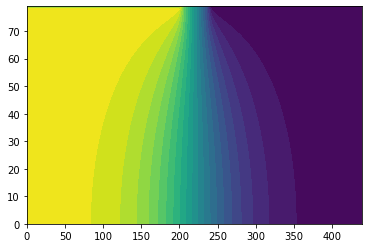

In [2]:
plt.contourf(np.flipud(h), levels=25)

## Naive Jacobi

In [ ]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
## Dam
ldam = 200
rdam = 240

## Head
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

# Naive Jacobi iteration
while error > tolerance:
    step = step + 1
    # Copy the head grid to residual
    residual = h.copy()
    
    b = np.zeros([80, 440])
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j <= ldam:
                b[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > ldam and j < (rdam + 1):
                b[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > (rdam):
                b[i,j]= rhead
            
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                b[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                b[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                b[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                b[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                b[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                b[i,j]=(h[i-1,j] + h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    h = b.copy()
    # Error
    error = (np.square(np.subtract(h, residual))).max()

print('# of steps: %d, error: %le' %(step, error))
plt.contour(np.flipud(h), levels=10)